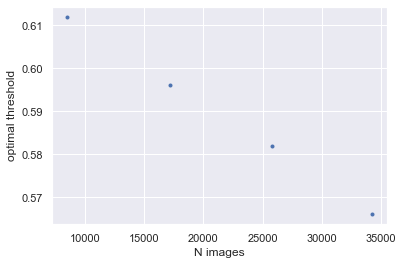

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
sns.set_theme()

len_df=np.array([34250,	25819,17127,8490])	
len_df=len_df[:,np.newaxis]


th=np.array([0.566,0.582,0.596,0.612])
th=th[:,np.newaxis]

fig, ax = plt.subplots()
ax.plot(len_df,th,'.')
ax.set_xlabel("N images")
ax.set_ylabel("optimal threshold")
plt.show()



looks linear, so a Linear regression could be a good aproximation for the Linear threshold 

In [2]:
reg=sm.OLS(th, sm.add_constant(len_df)).fit(cov_type='HC2')
reg.summary()

C:\Users\kevin\Anaconda3\envs\myenv\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4595.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           0.000218
Time:                        14:43:39   Log-Likelihood:                 24.588
No. Observations:                   4   AIC:                            -45.18
Df Residuals:                       2   BIC:                            -46.40
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6269      0.001   1199.014      0.000       0.626       0.628
x1         -1.768e-06   2.61e-08    -67.786      0.000   -1.82e-06   -1.72e-06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.358
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.386
Skew:                           0.406   Prob(JB):                        0.824
Kurtosis:                       1.713   Cond. No.                     5.74e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

so we have 

$threshold=(-1.768e-06\pm 2.61e-08)\times N images+(0.6269 \pm 0.001)$

and I will use this for the submission that uses the test data

In [13]:
def th_len_df(len_of_df):
    return -1.768e-06*len_of_df+0.6269
